In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import time, datetime
import re
from scipy.stats import boxcox
import pandas.plotting as pdplt

In [58]:
data=pd.read_csv('./OneHot_Encoding.csv')

In [59]:
data

,stops,duration,days_left,price,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,airline_Air India,airline_AirAsia,...,departure_category_Evening,departure_category_Late Night,departure_category_Morning,departure_category_Night,arrival_category_Afternoon,arrival_category_Early Morning,arrival_category_Evening,arrival_category_Late Night,arrival_category_Morning,arrival_category_Night
0,0.0,130.0,1.0,5953.0,-1.000000,-1.836970e-16,-7.071068e-01,7.071068e-01,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,140.0,1.0,5953.0,1.000000,6.123234e-17,8.660254e-01,-5.000000e-01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,130.0,1.0,5956.0,0.866025,5.000000e-01,1.000000e+00,6.123234e-17,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,135.0,1.0,5955.0,0.500000,-8.660254e-01,1.224647e-16,-1.000000e+00,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,140.0,1.0,5955.0,0.866025,-5.000000e-01,2.588190e-01,-9.659258e-01,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299732,1.0,1045.0,43.0,51345.0,1.000000,6.123234e-17,-2.588190e-01,9.659258e-01,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
299733,1.0,1050.0,43.0,51345.0,-0.965926,-2.588190e-01,5.000000e-01,-8.660254e-01,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299734,1.0,1380.0,43.0,51345.0,-0.866025,5.000000e-01,-9.659258e-01,2.588190e-01,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299735,1.0,610.0,43.0,66779.0,0.500000,-8.660254e-01,-8.660254e-01,5.000000e-01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
# economy data target will be price_unskewed_boxcox
# business data target will be price_unskewed_sqrt
data.drop(['price_unskewed'], axis=1, inplace=True)
economy_data = data[data['class_economy'] == 1].drop(['class_business', 'class_economy'], axis=1)
business_data = data[data['class_business'] == 1].drop(['class_economy', 'class_business'], axis=1)
economy_data.drop(['price', 'price_unskewed_sqrt'], axis=1, inplace=True)
business_data.drop(['price', 'price_unskewed_boxcox'], axis=1, inplace=True)

In [61]:

print(economy_data.shape)
print(business_data.shape)

(206512, 47)
(93225, 47)


In [62]:
# Preprocess X and y(target) values
X_economy = economy_data.drop(['price_unskewed_boxcox'], axis=1)
y_economy = economy_data['price_unskewed_boxcox']

X_business = business_data.drop(['price_unskewed_sqrt'], axis=1)
y_business = business_data['price_unskewed_sqrt']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the economy data
X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Training the model for economy class
model_economy = LinearRegression()
model_economy.fit(X_train_economy, y_train_economy)

# Predicting and evaluating for economy class
predictions_economy = model_economy.predict(X_test_economy)
rmse_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_economy))
print(f'Economy class RMSE: {rmse_economy}')


# Splitting the business data
X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

# Training the model for business class
model_business = LinearRegression()
model_business.fit(X_train_business, y_train_business)

# Predicting and evaluating for business class
predictions_business = model_business.predict(X_test_business)
rmse_business = np.sqrt(mean_squared_error(y_test_business, predictions_business))
print(f'business class RMSE: {rmse_business}')

Economy class RMSE: 0.039925867384504606
business class RMSE: 19.531988931142358


In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_price_economy = y_train_economy.mean()
predictions_baseline_economy = [mean_price_economy] * len(y_test_economy)
rmse_baseline_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_baseline_economy))
print(f"Economy Baseline Model RMSE: {rmse_baseline_economy}")


mean_price_business = y_train_business.mean()
predictions_baseline_business = [mean_price_business] * len(y_test_business)
rmse_baseline_business = np.sqrt(mean_squared_error(y_test_business, predictions_baseline_business))
print(f"Business Baseline Model RMSE: {rmse_baseline_business}")


Economy Baseline Model RMSE: 0.06190442438833919
Business Baseline Model RMSE: 29.417159404605385


In [65]:
print(f"Economy Mean Price: {y_train_economy.mean()}, Std Dev of Price: {y_train_economy.std()}")
print(f"Business Mean Price: {y_train_business.mean()}, Std Dev of Price: {y_train_business.std()}")


Economy Mean Price: 3.5535725202056736, Std Dev of Price: 0.06226774526653897
Business Mean Price: 227.2744704887279, Std Dev of Price: 29.621007771492213


In [66]:
from sklearn.model_selection import cross_val_score

scores_economy = cross_val_score(model_economy, X_economy, y_economy, cv=5, scoring='neg_mean_squared_error')
rmse_scores_economy = np.sqrt(-scores_economy)
print(f"Cross-Validation RMSE: {rmse_scores_economy.mean()}")

scores_business = cross_val_score(model_business, X_business, y_business, cv=5, scoring='neg_mean_squared_error')
rmse_scores_business = np.sqrt(-scores_business)
print(f"Cross-Validation RMSE: {rmse_scores_business.mean()}")

Cross-Validation RMSE: 0.041188604566076294
Cross-Validation RMSE: 469365930.8753867


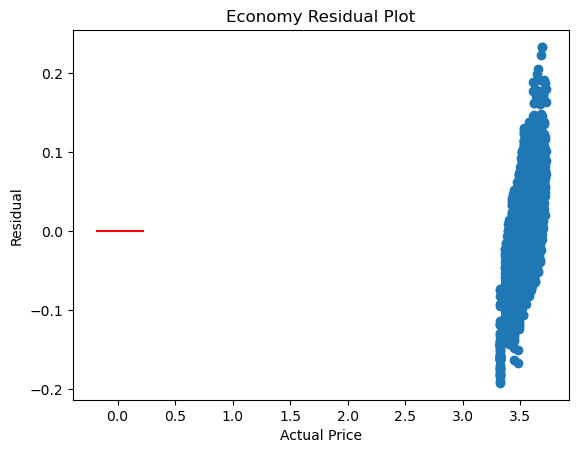

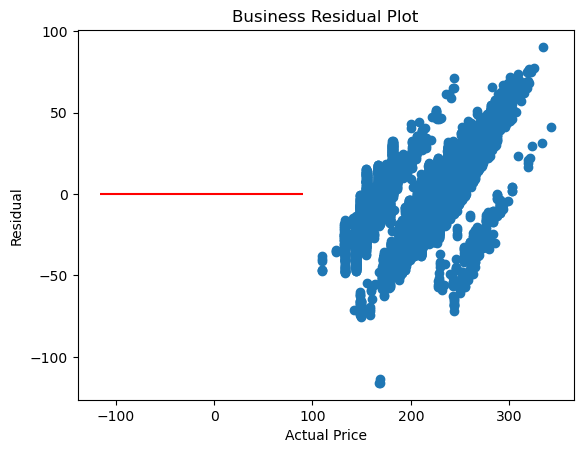

In [67]:
residuals_economy = y_test_economy - predictions_economy
plt.scatter(y_test_economy, residuals_economy)
plt.hlines(y=0, xmin=residuals_economy.min(), xmax=residuals_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot')
plt.show()

residuals_business = y_test_business - predictions_business
plt.scatter(y_test_business, residuals_business)
plt.hlines(y=0, xmin=residuals_business.min(), xmax=residuals_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot')
plt.show()


In [68]:
import numpy as np

# Apply log transformation
y_train_economy_log = np.log(y_train_economy)
y_test_economy_log = np.log(y_test_economy)

# Retrain the model on the transformed target variable
model_economy_log = LinearRegression()
model_economy_log.fit(X_train_economy, y_train_economy_log)

# Predict on the test set and transform predictions back to the original scale
predictions_economy_log = model_economy_log.predict(X_test_economy)
predictions_economy_log = np.exp(predictions_economy_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_economy_log = np.sqrt(mean_squared_error(y_test_economy, predictions_economy_log))
print(f"Economy class RMSE after log transformation: {rmse_economy_log}")


# Apply log transformation
y_train_business_log = np.log(y_train_business)
y_test_business_log = np.log(y_test_business)

# Retrain the model on the transformed target variable
model_business_log = LinearRegression()
model_business_log.fit(X_train_business, y_train_business_log)

# Predict on the test set and transform predictions back to the original scale
predictions_business_log = model_business_log.predict(X_test_business)
predictions_business_log = np.exp(predictions_business_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_business_log = np.sqrt(mean_squared_error(y_test_business, predictions_business_log))
print(f"business class RMSE after log transformation: {rmse_business_log}")


Economy class RMSE after log transformation: 0.03993224354561343
business class RMSE after log transformation: 20.10419051504639


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_economy, y_train_economy,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Economy Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_business, y_train_business,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Business Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


Economy Average RMSE (log-transformed target) with 5-Fold CV: 0.039894954283017224
Business Average RMSE (log-transformed target) with 5-Fold CV: 20.46016423686109


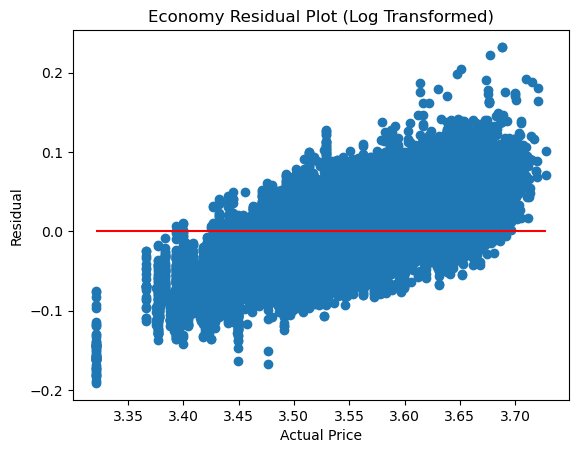

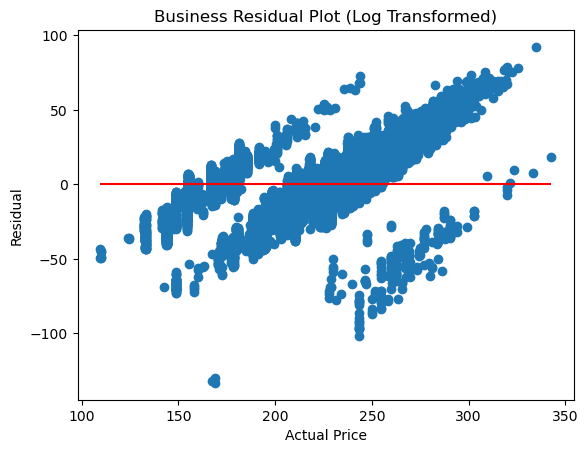

In [70]:
# Calculate residuals for the transformed predictions
residuals_economy_log = y_test_economy - predictions_economy_log

# Plot residuals for economy class
plt.scatter(y_test_economy, residuals_economy_log)
plt.hlines(y=0, xmin=y_test_economy.min(), xmax=y_test_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot (Log Transformed)')
plt.show()

# Calculate residuals for the transformed predictions
residuals_business_log = y_test_business - predictions_business_log

# Plot residuals for business class
plt.scatter(y_test_business, residuals_business_log)
plt.hlines(y=0, xmin=y_test_business.min(), xmax=y_test_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot (Log Transformed)')
plt.show()


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to train regression models with cross-validation and visualize performance
def train_and_evaluate_models_cv(X, y, model_name):
    if model_name == 'Random Forest':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boost':
        model = GradientBoostingRegressor()
    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor()
    else:
        print("Invalid model name!")
        return
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # Convert scores to positive and calculate RMSE
    rmse_scores = np.sqrt(-cv_scores)
    print(f"Cross-Validation RMSE for {model_name}: {rmse_scores}")
    print(f"Average Cross-Validation RMSE for {model_name}: {np.mean(rmse_scores)}")

# Split the data into training and testing sets for economy_data
# X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)  
# Train and evaluate models with cross-validation for economy_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models_cv(X_economy, y_economy, model_name)

# X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)
# Repeat for business_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models_cv(X_business, y_business, model_name)
    
########### Results #############
# Economy_data:
# Cross-Validation RMSE for Random Forest: [ 2.44612261  2.25555928  8.1028422   2.03156291 53.55437053]
# Average Cross-Validation RMSE for Random Forest: 13.678091506837877
# Cross-Validation RMSE for Gradient Boost: [34.85979103 37.19678787 39.9004169  36.07631992 63.61570988]
# Average Cross-Validation RMSE for Gradient Boost: 42.329805120449464
# Cross-Validation RMSE for XGBoost: [231.6327583  248.56870339 209.97125982 153.33542181 286.75104354]
# Average Cross-Validation RMSE for XGBoost: 226.05183737194164
# 
# Business_data:
# Cross-Validation RMSE for Random Forest: [66.0332981  33.44548284 61.4244565  94.39005935 43.44830987]
# Average Cross-Validation RMSE for Random Forest: 59.74832133128249
# Cross-Validation RMSE for Gradient Boost: [140.23658807 132.62425864 119.92174791 155.70270995 146.82577961]
# Average Cross-Validation RMSE for Gradient Boost: 139.06221683561844
# Cross-Validation RMSE for XGBoost: [502.36279919 643.17678454 430.61896173 647.02761566 599.42765945]
# Average Cross-Validation RMSE for XGBoost: 564.5227641157431


Cross-Validation RMSE for Random Forest: [0.0396167  0.03348198 0.03426179 0.03261886 0.04129857]
Average Cross-Validation RMSE for Random Forest: 0.03625557902728993
Cross-Validation RMSE for Gradient Boost: [0.03325993 0.03404419 0.03114714 0.02915615 0.03827138]
Average Cross-Validation RMSE for Gradient Boost: 0.03317576000175175
Cross-Validation RMSE for XGBoost: [0.04180545 0.03268271 0.03176854 0.02854941 0.03939761]
Average Cross-Validation RMSE for XGBoost: 0.0348407442175835
Cross-Validation RMSE for Random Forest: [25.36069545 18.59072537 20.34775239 18.81130922 18.63287246]
Average Cross-Validation RMSE for Random Forest: 20.34867097517067
Cross-Validation RMSE for Gradient Boost: [21.02325695 18.9504     18.98143513 16.52792238 18.81242602]
Average Cross-Validation RMSE for Gradient Boost: 18.85908809590839
Cross-Validation RMSE for XGBoost: [21.86330934 19.58867511 18.39735524 17.46509753 17.18529945]
Average Cross-Validation RMSE for XGBoost: 18.899947335023306


RMSE for Random Forest: 0.016405295157980507


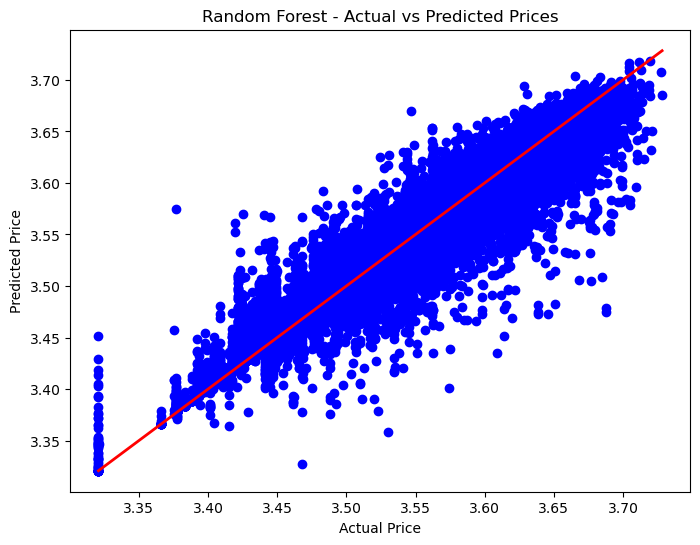

RMSE for Gradient Boost: 0.030443611083017647


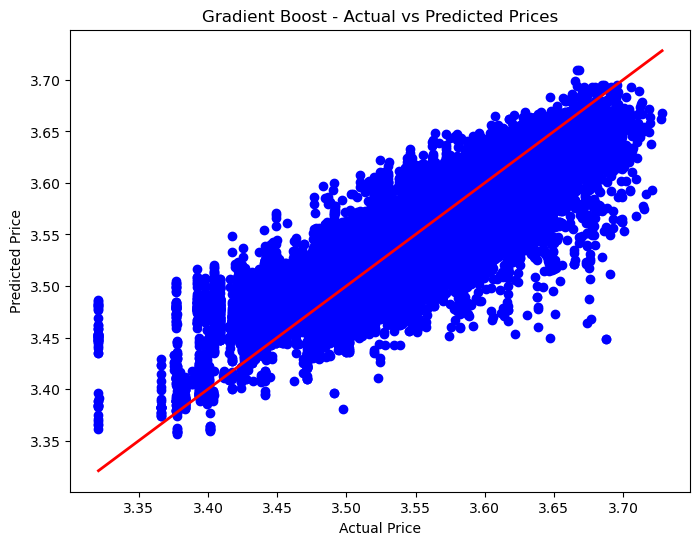

RMSE for XGBoost: 0.022231157467189785


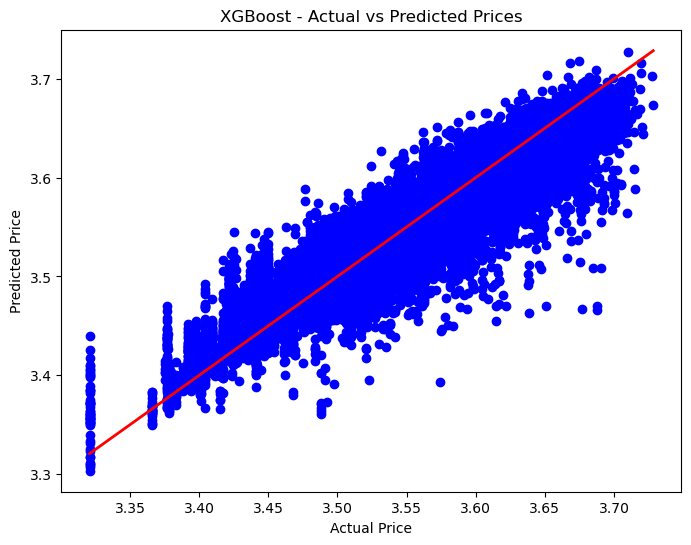

RMSE for Random Forest: 7.352245988616851


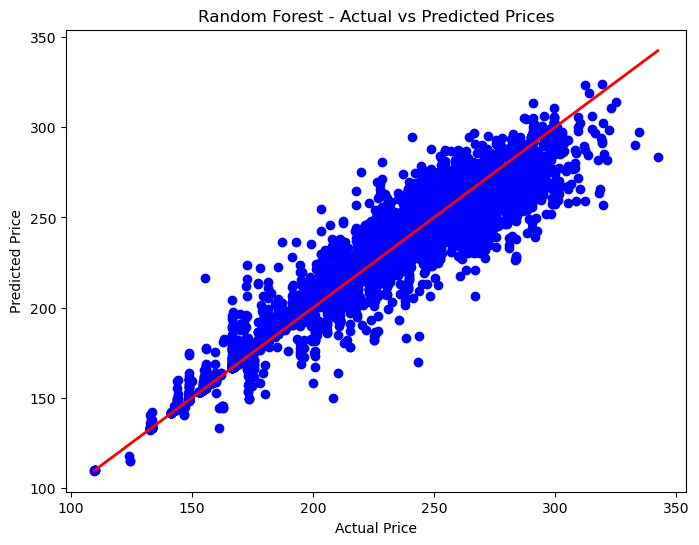

RMSE for Gradient Boost: 15.981150884557856


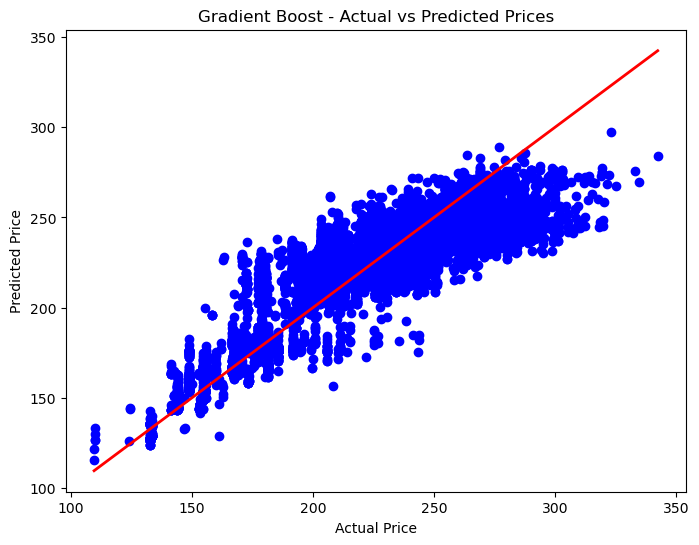

RMSE for XGBoost: 9.015463268326993


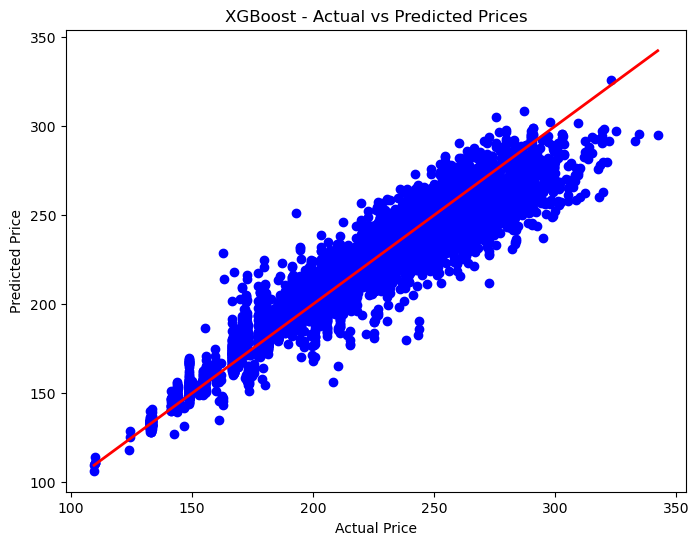

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to train regression models and visualize performance
def train_and_evaluate_models(X_train, X_test, y_train, y_test, model_name):
    if model_name == 'Random Forest':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boost':
        model = GradientBoostingRegressor()
    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor()
    else:
        print("Invalid model name!")
        return
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE for {model_name}: {rmse}")
    
    # Visualize actual vs predicted prices
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f"{model_name} - Actual vs Predicted Prices")
    plt.show()

# Split the data into training and testing sets for economy_data
X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Train and evaluate models for economy_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models(X_train_economy, X_test_economy, y_train_economy, y_test_economy, model_name)

X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models(X_train_business, X_test_business, y_train_business, y_test_business, model_name)


In [80]:
for i, column in enumerate(X_economy.columns):
    print(f"Column {i}: {column}")

Column 0: stops
Column 1: duration
Column 2: days_left
Column 3: departure_hour_sin
Column 4: departure_hour_cos
Column 5: arrival_hour_sin
Column 6: arrival_hour_cos
Column 7: airline_Air India
Column 8: airline_AirAsia
Column 9: airline_GO FIRST
Column 10: airline_Indigo
Column 11: airline_SpiceJet
Column 12: airline_StarAir
Column 13: airline_Trujet
Column 14: airline_Vistara
Column 15: source_city_Bangalore
Column 16: source_city_Chennai
Column 17: source_city_Delhi
Column 18: source_city_Hyderabad
Column 19: source_city_Kolkata
Column 20: source_city_Mumbai
Column 21: destination_city_Bangalore
Column 22: destination_city_Chennai
Column 23: destination_city_Delhi
Column 24: destination_city_Hyderabad
Column 25: destination_city_Kolkata
Column 26: destination_city_Mumbai
Column 27: day_of_week_Friday
Column 28: day_of_week_Monday
Column 29: day_of_week_Saturday
Column 30: day_of_week_Sunday
Column 31: day_of_week_Thursday
Column 32: day_of_week_Tuesday
Column 33: day_of_week_Wednes

Feature ranking:
1. feature 2 (0.481779)
2. feature 1 (0.246544)
3. feature 8 (0.096383)
4. feature 10 (0.037103)
5. feature 14 (0.036948)
6. feature 19 (0.021889)
7. feature 0 (0.017461)
8. feature 25 (0.015604)
9. feature 7 (0.012912)
10. feature 5 (0.005611)
11. feature 9 (0.005562)
12. feature 4 (0.004516)
13. feature 16 (0.003946)
14. feature 24 (0.002944)
15. feature 3 (0.002047)
16. feature 22 (0.001838)
17. feature 18 (0.001442)
18. feature 20 (0.001146)
19. feature 15 (0.000833)
20. feature 30 (0.000593)
21. feature 21 (0.000584)
22. feature 11 (0.000444)
23. feature 17 (0.000387)
24. feature 29 (0.000371)
25. feature 23 (0.000314)
26. feature 6 (0.000228)
27. feature 32 (0.000202)
28. feature 26 (0.000165)
29. feature 33 (0.000116)
30. feature 27 (0.000067)
31. feature 28 (0.000008)
32. feature 13 (0.000006)
33. feature 36 (0.000004)
34. feature 42 (0.000000)
35. feature 43 (0.000000)
36. feature 41 (0.000000)
37. feature 40 (0.000000)
38. feature 39 (0.000000)
39. feature 34

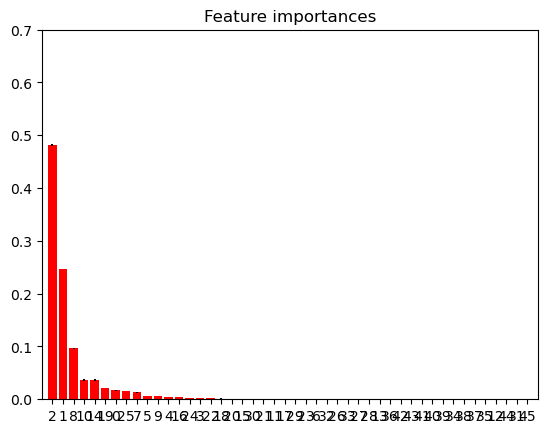

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import KFold

# Define the number of folds
n_splits = 5  # You can adjust this value as needed

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

estimator = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation to compute feature importances
cv_scores = cross_val_score(estimator, X_economy, y_economy, cv=kf, scoring='neg_mean_squared_error')

# Fit the estimator to get feature importances for each fold
importances_list = []
for train_index, test_index in kf.split(X_economy):
    X_train, X_test = X_economy.iloc[train_index], X_economy.iloc[test_index]
    y_train, y_test = y_economy.iloc[train_index], y_economy.iloc[test_index]
    estimator.fit(X_train, y_train)
    importances_list.append(estimator.feature_importances_)

# Compute average feature importances across folds
avg_importances = np.mean(importances_list, axis=0)
std_importances = np.std(importances_list, axis=0)
indices = np.argsort(avg_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_economy.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], avg_importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_economy.shape[1]), avg_importances[indices], color="r", yerr=std_importances[indices], align="center")
plt.xticks(range(X_economy.shape[1]), indices)
plt.xlim([-1, X_economy.shape[1]])
plt.ylim([0, 0.7])
plt.show()


In [81]:
# Assuming 'data' is your DataFrame
for i, column in enumerate(X_business.columns):
    print(f"Column {i}: {column}")

Column 0: stops
Column 1: duration
Column 2: days_left
Column 3: departure_hour_sin
Column 4: departure_hour_cos
Column 5: arrival_hour_sin
Column 6: arrival_hour_cos
Column 7: airline_Air India
Column 8: airline_AirAsia
Column 9: airline_GO FIRST
Column 10: airline_Indigo
Column 11: airline_SpiceJet
Column 12: airline_StarAir
Column 13: airline_Trujet
Column 14: airline_Vistara
Column 15: source_city_Bangalore
Column 16: source_city_Chennai
Column 17: source_city_Delhi
Column 18: source_city_Hyderabad
Column 19: source_city_Kolkata
Column 20: source_city_Mumbai
Column 21: destination_city_Bangalore
Column 22: destination_city_Chennai
Column 23: destination_city_Delhi
Column 24: destination_city_Hyderabad
Column 25: destination_city_Kolkata
Column 26: destination_city_Mumbai
Column 27: day_of_week_Friday
Column 28: day_of_week_Monday
Column 29: day_of_week_Saturday
Column 30: day_of_week_Sunday
Column 31: day_of_week_Thursday
Column 32: day_of_week_Tuesday
Column 33: day_of_week_Wednes

Feature ranking:
1. feature 1 (0.668920)
2. feature 7 (0.073827)
3. feature 14 (0.044092)
4. feature 2 (0.029725)
5. feature 17 (0.023986)
6. feature 23 (0.017345)
7. feature 4 (0.016366)
8. feature 3 (0.015911)
9. feature 24 (0.015402)
10. feature 25 (0.013549)
11. feature 18 (0.013176)
12. feature 19 (0.013140)
13. feature 0 (0.012354)
14. feature 26 (0.010201)
15. feature 5 (0.010144)
16. feature 6 (0.008509)
17. feature 20 (0.006106)
18. feature 21 (0.003813)
19. feature 15 (0.002332)
20. feature 22 (0.000499)
21. feature 16 (0.000493)
22. feature 27 (0.000099)
23. feature 30 (0.000009)
24. feature 43 (0.000005)
25. feature 11 (0.000000)
26. feature 42 (0.000000)
27. feature 41 (0.000000)
28. feature 40 (0.000000)
29. feature 39 (0.000000)
30. feature 38 (0.000000)
31. feature 37 (0.000000)
32. feature 8 (0.000000)
33. feature 9 (0.000000)
34. feature 10 (0.000000)
35. feature 12 (0.000000)
36. feature 28 (0.000000)
37. feature 13 (0.000000)
38. feature 36 (0.000000)
39. feature 35

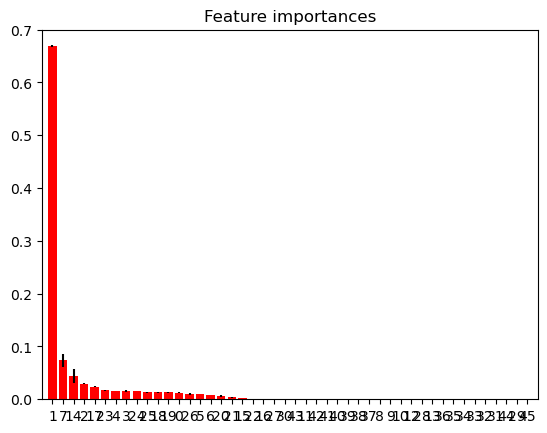

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import KFold

# Define the number of folds
n_splits = 5  # You can adjust this value as needed

# Initialize the KFold splitter
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

estimator = GradientBoostingRegressor(n_estimators=100, random_state=42)
# Perform cross-validation to compute feature importances
cv_scores = cross_val_score(estimator, X_business, y_business, cv=kf, scoring='neg_mean_squared_error')

# Fit the estimator to get feature importances for each fold
importances_list = []
for train_index, test_index in kf.split(X_business):
    X_train, X_test = X_business.iloc[train_index], X_business.iloc[test_index]
    y_train, y_test = y_business.iloc[train_index], y_business.iloc[test_index]
    estimator.fit(X_train, y_train)
    importances_list.append(estimator.feature_importances_)

# Compute average feature importances across folds
avg_importances = np.mean(importances_list, axis=0)
std_importances = np.std(importances_list, axis=0)
indices = np.argsort(avg_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_business.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], avg_importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_business.shape[1]), avg_importances[indices], color="r", yerr=std_importances[indices], align="center")
plt.xticks(range(X_business.shape[1]), indices)
plt.xlim([-1, X_business.shape[1]])
plt.ylim([0, 0.7])
plt.show()